# Data Wrangling

### Loading in Data

In [1]:
library(haven)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
load('data/data_parking_nosf.rda')
ls()

[1] "census_data_parking"

In [3]:
new_census <- census_data_parking %>% filter(meters_contained != 0)
new_census <-  new_census %>% rename(Median_total_income = v_CA21_906..Median.total.income.of.household.in.2020....)
#glimpse(new_census)

### 1st Dataset Grouped by meter

In [4]:
new_census_1 <- new_census %>% mutate(meter_rate_low =
                                             meters_at_rate_0.5 +
                                             meters_at_rate_1 +
                                             meters_at_rate_1.5 +
                                             meters_at_rate_2 +
                                             meters_at_rate_2.5 +
                                             meters_at_rate_3 +
                                             meters_at_rate_3.5) %>% mutate(meter_rate_medium = meters_at_rate_4 +
                                                                            meters_at_rate_5 +
                                                                            meters_at_rate_6 +
                                                                            meters_at_rate_7) %>% mutate(meter_rate_high = meters_at_rate_8 +
                                                                                                         meters_at_rate_9 +
                                                                                                         meters_at_rate_10 +
                                                                                                         meters_at_rate_11)              
new_census_1 <- new_census_1 %>% select(GeoUID, Population, Median_total_income, meters_contained, meter_rate_low, meter_rate_medium, meter_rate_high)
head(new_census_1)

,GeoUID,Population,Median_total_income,meters_contained,meter_rate_low,meter_rate_medium,meter_rate_high
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59150345,597,86000,8,3,5,0
2,59150346,409,99000,1,1,0,0
3,59150347,504,67000,6,6,0,0
4,59150354,525,66000,2,2,0,0
5,59150355,531,56000,2,2,0,0
6,59150356,473,90000,5,5,0,0


### 2nd Dataset with Weighted Average Column

In [5]:
new_census_2 <- new_census %>% mutate(weighted_avg_rate = meters_at_rate_0.5/meters_contained * 0.5 + 
                                        meters_at_rate_1/meters_contained * 1 +
                                        meters_at_rate_1.5/meters_contained * 1.5 +
                                        meters_at_rate_2/meters_contained * 2 +
                                        meters_at_rate_2.5/meters_contained * 2.5 +
                                        meters_at_rate_3/meters_contained * 3 +
                                        meters_at_rate_3.5/meters_contained * 3.5 +
                                        meters_at_rate_4/meters_contained * 4 +
                                        meters_at_rate_5/meters_contained * 5 +
                                        meters_at_rate_6/meters_contained * 6 +
                                        meters_at_rate_7/meters_contained * 7 +
                                        meters_at_rate_8/meters_contained * 8 +
                                        meters_at_rate_9/meters_contained * 9 + 
                                        meters_at_rate_10/meters_contained * 10 +
                                        meters_at_rate_11/meters_contained * 11)
new_census_2 <- new_census_2 %>% select(GeoUID, weighted_avg_rate)

###  Merging Both Datasets

In [6]:
df <- merge(new_census_1, new_census_2, by = 'GeoUID')
head(df)

,GeoUID,Population,Median_total_income,meters_contained,meter_rate_low,meter_rate_medium,meter_rate_high,weighted_avg_rate
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59150345,597,86000,8,3,5,0,3.250000
2,59150346,409,99000,1,1,0,0,2.000000
3,59150347,504,67000,6,6,0,0,2.333333
4,59150354,525,66000,2,2,0,0,1.500000
5,59150355,531,56000,2,2,0,0,1.000000
6,59150356,473,90000,5,5,0,0,1.400000


# Summary Statistics Table

In [17]:
library(knitr)
#install.packages('gt')
library(htmltools)
library(IRdisplay)
library(gt)

show_table <- function(table) {
   display_html(as_raw_html(table))
 }

In [8]:
mean_population <- mean(df$Population, na.rm = TRUE)
sd_population <- sd(df$Population, na.rm = TRUE)
mean_income <- mean(df$Median_total_income, na.rm = TRUE)
sd_income <- sd(df$Median_total_income, na.rm = TRUE)
mean_meters_contained <- mean(df$meters_contained, na.rm = TRUE)
sd_meters_contained <- sd(df$meters_contained, na.rm = TRUE)
mean_rate_low <- mean(df$meter_rate_low, na.rm = TRUE)
sd_rate_low <- sd(df$meter_rate_low, na.rm = TRUE)
mean_rate_medium <- mean(df$meter_rate_medium, na.rm = TRUE)
sd_rate_medium <- sd(df$meter_rate_medium, na.rm = TRUE)
mean_rate_high <- mean(df$meter_rate_high, na.rm = TRUE)
sd_rate_high <- sd(df$meter_rate_high, na.rm = TRUE)
mean_weighted_avg <- mean(df$weighted_avg_rate, na.rm = TRUE)
sd_weighted_avg <- sd(df$weighted_avg_rate, na.rm = TRUE)


table <- data.frame(
   Variable = c("Population", 'Median_total_income', "meters_contained", 'meter_rate_low', 'meter_rate_medium', 'meter_rate_high', 'weighted_avg_rate'),
   Mean = c(mean_population, mean_income, mean_meters_contained, mean_rate_low, mean_rate_medium, mean_rate_high, mean_weighted_avg),
   SD = c(sd_population, sd_income, sd_meters_contained, sd_rate_low, sd_rate_medium, sd_rate_high, sd_weighted_avg)
 )
kable(table)



|Variable            |         Mean|           SD|
|:-------------------|------------:|------------:|
|Population          | 7.999453e+02|   624.379006|
|Median_total_income | 7.926840e+04| 23075.141808|
|meters_contained    | 2.286131e+01|    33.946129|
|meter_rate_low      | 1.752920e+01|    28.675158|
|meter_rate_medium   | 4.854015e+00|    13.182317|
|meter_rate_high     | 4.781022e-01|     2.666004|
|weighted_avg_rate   | 1.993885e+00|     1.316235|

In [19]:
table1 <- table %>% gt()
show_table(table1)

<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Variable" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left">Variable 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="Mean" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">Mean 
 <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="SD" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" bgcolor="#FFFFFF" valign="bottom" align="right">SD 
 
 
 
 Population 
<td headers="Mean" class="gt_row gt_right" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: solid; border-top-width: 1px; border-top-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: middle; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" valign="middle" align="right">7.999453e+02 
<td headers="SD" class="gt_row gt_right" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; margin: 10px; border-top-style: solid; border-top-width: 1px; border-top-color: #D3D3D3; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: middle; overflow-x: hidden; text-align: right; font-variant-numeric: tabular-nums;" valign="middle" align="right">624.379006 
 Median_total_income 
<td headers="Mean" class="gt_row gt_right" style="border-style: none; padding-top: 8px; padding-bottom: 8px; padding-left: 5px; padding-right: 5px; ma

# Plotting Relationships

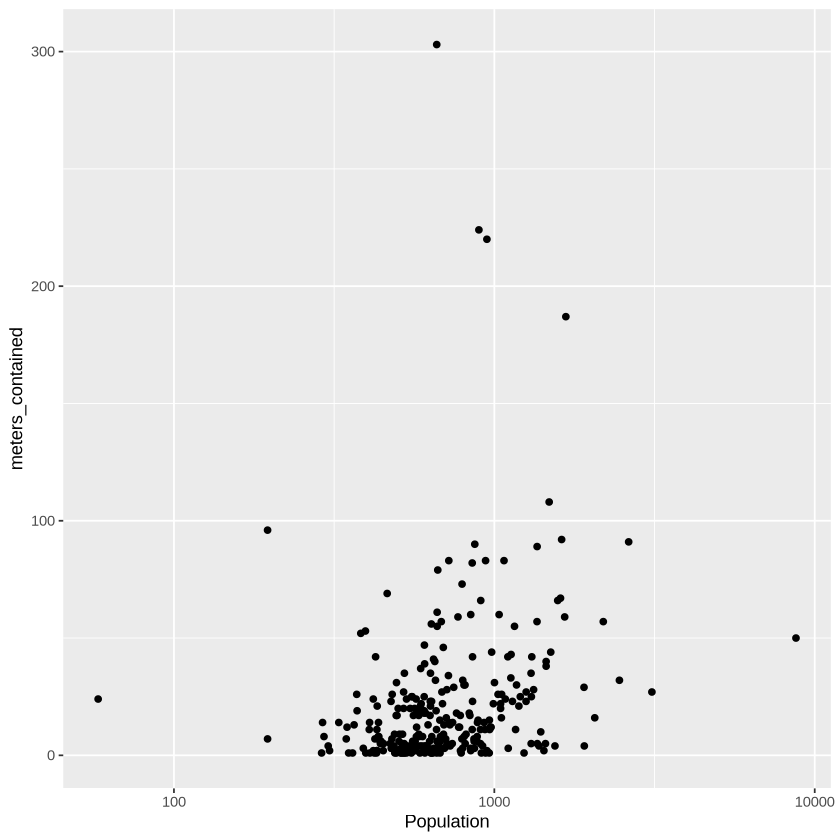

In [26]:
# 1st plot could be population against number of parking meters with pop on x-axis & meters_contained on y-axis
fig1 <- ggplot(data = df, aes(x = Population, y = meters_contained))
fig1 + geom_point() + scale_x_continuous(trans = "log10") #scales the x-axis by logarithmic scaling

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


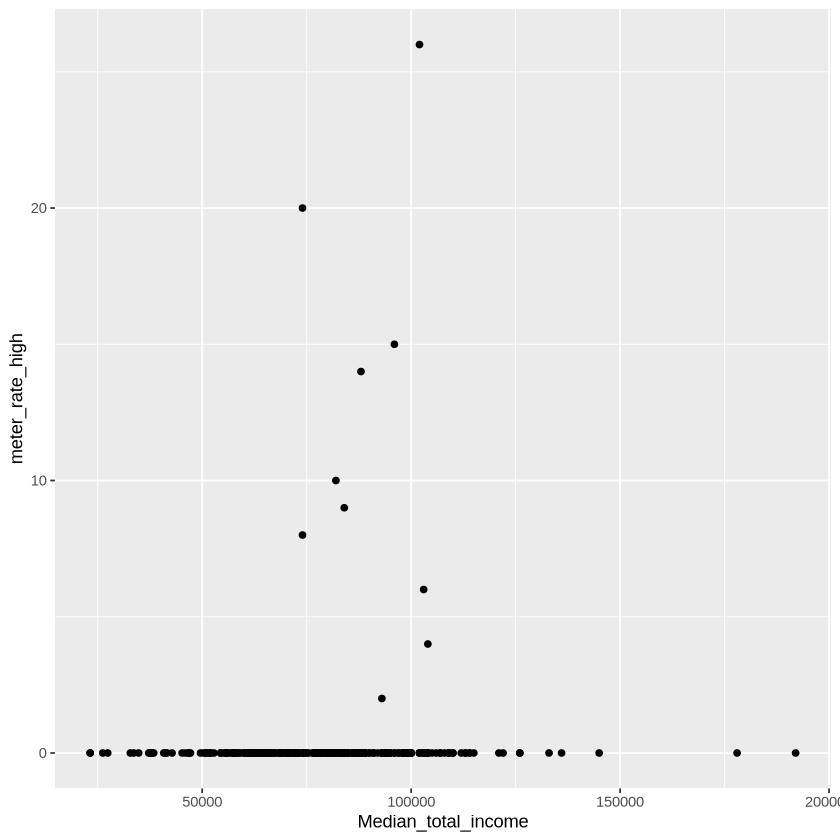

In [39]:
#2nd plot could be three seperate lines, each line is income on x-axis and # of one of 3 group of meter_rate on y-axis
fig2a <- ggplot(data = df, aes(x = Median_total_income, y = meter_rate_low))
fig2b <- ggplot(data = df, aes(x = Median_total_income, y = meter_rate_medium))
fig2c <- ggplot(data = df, aes(x = Median_total_income, y = meter_rate_high))
fig2 + geom_point()

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


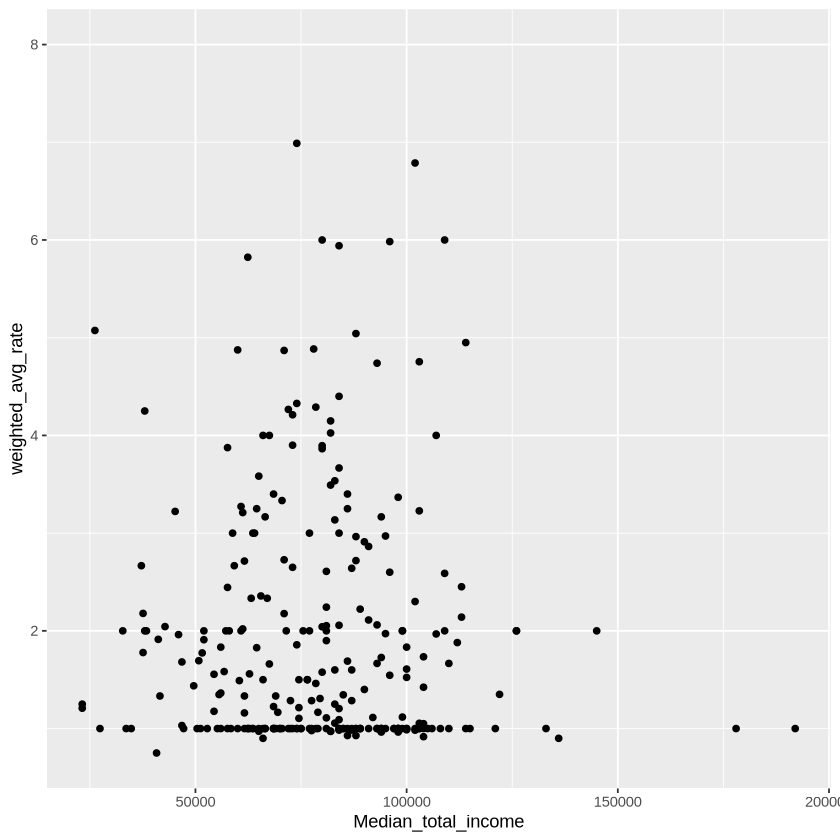

In [25]:
#3rd plot could just be income on x-axis against weighted_avg_rate on y-axis
fig3 <- ggplot(data = df, aes(x = Median_total_income, y = weighted_avg_rate))
fig3 + geom_point()

### Testing Commute Method Variable

In [12]:
#load('data/data_parking_nosf (1).rda')
#ls()
#glimpse(census_data_parking)

In [13]:
#try <- census_data_parking %>% select(v_CA21_7617..Total...Commuting.destination.for.the.employed.labour.force.aged.15.years.and.over.with.a.usual.place.of.work: v_CA21_7662..15.to.29.minutes)
#try